Anggota Kelompok :<p>
Nanda Pratama - 22.11.4623<p>
Yuli Dwi Kurniawan - 22.11.4675

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Membaca dan Memahami Data

In [ ]:
import pandas as pd

# Membaca dataset
data = pd.read_csv('/content/drive/MyDrive/Bdl/kidney_disease.csv')

# Menampilkan ringkasan dataset
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

Pre-processing Data

In [ ]:
# Membersihkan data (hapus karakter tidak valid, konversi tipe data)
data_cleaned = data.copy()

# Membersihkan spasi atau karakter "\t" pada kolom bertipe object
for col in data_cleaned.select_dtypes(include='object').columns:
    data_cleaned[col] = data_cleaned[col].astype(str).str.strip().replace({'\t?': None})

# Mengubah kolom seperti "pcv", "wc", "rc" menjadi numerik
numeric_like_columns = ['pcv', 'wc', 'rc']
for col in numeric_like_columns:
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')

# Menangani nilai kosong (imputasi)
from sklearn.impute import SimpleImputer

numerical_imputer = SimpleImputer(strategy='mean')
categorical_imputer = SimpleImputer(strategy='most_frequent')

numerical_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data_cleaned.select_dtypes(include='object').columns

data_cleaned[numerical_cols] = numerical_imputer.fit_transform(data_cleaned[numerical_cols])
data_cleaned[categorical_cols] = categorical_imputer.fit_transform(data_cleaned[categorical_cols])


Exploratory Data Analysis (EDA)

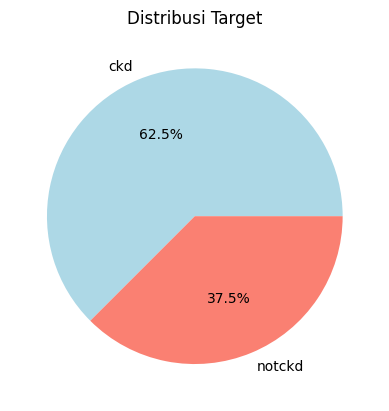

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi 1: Distribusi target (pie chart)
data_cleaned['classification'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title('Distribusi Target')
plt.ylabel('')
plt.show()


<ipython-input-18-f616b618ddbe>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data_cleaned, x='htn', palette='pastel')


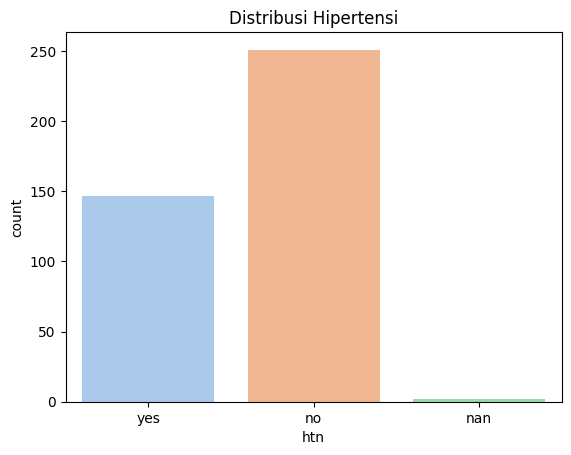

In [ ]:
# Visualisasi 2: Bar chart untuk hipertensi
sns.countplot(data=data_cleaned, x='htn', palette='pastel')
plt.title('Distribusi Hipertensi')
plt.show()

<ipython-input-19-a279643185c8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x='classification', y='age', palette='coolwarm')


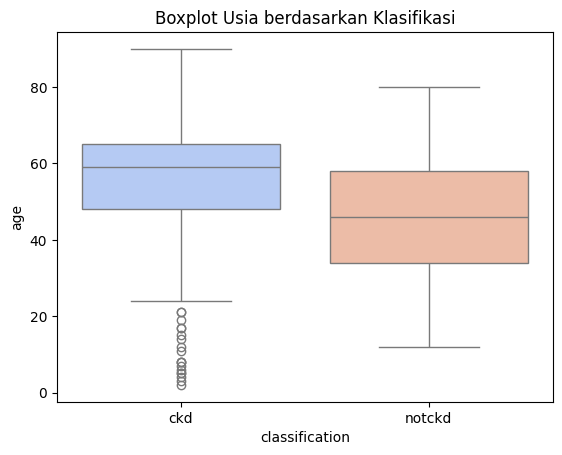

In [ ]:
# Visualisasi 3: Boxplot kolom numerik tertentu
sns.boxplot(data=data_cleaned, x='classification', y='age', palette='coolwarm')
plt.title('Boxplot Usia berdasarkan Klasifikasi')
plt.show()

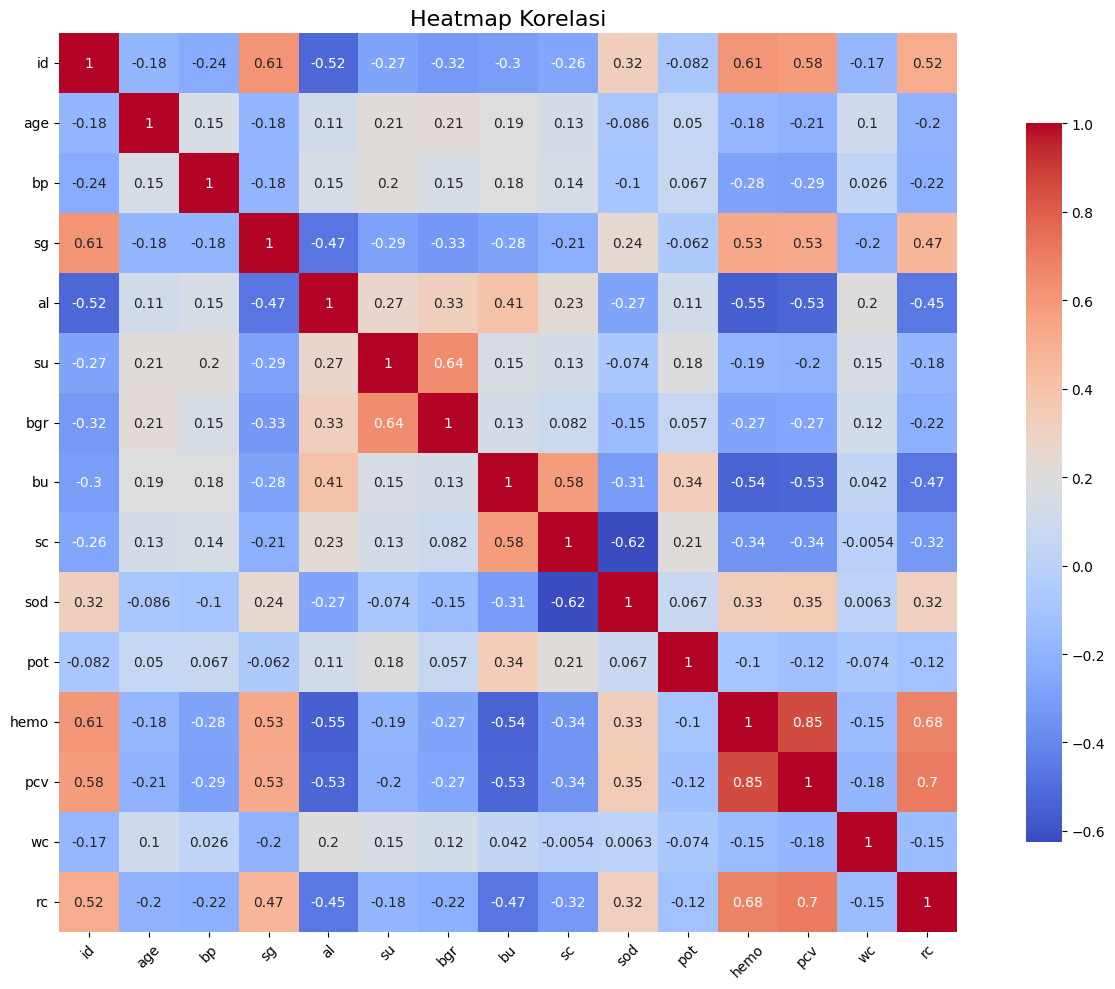

In [ ]:
# Visualisasi 4: Heatmap korelasi
numerical_data = data_cleaned.select_dtypes(include=['number'])
numerical_data = numerical_data.dropna()
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(14, 10))  # Ukuran figure
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    cbar_kws={'shrink': 0.8},  # Ukuran colorbar
    annot_kws={"size": 10},    # Ukuran font annotasi
    square=True                # Membuat sel persegi
)
plt.xticks(rotation=45)  # Rotasi label x-axis
plt.yticks(rotation=0)   # Rotasi label y-axis
plt.title('Heatmap Korelasi', fontsize=16)  # Ukuran font judul
plt.tight_layout()  # Atur tata letak otomatis
plt.show()


 Membagi Data untuk Training dan Testing

In [ ]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = data_cleaned.drop('classification', axis=1)
y = data_cleaned['classification']

# Encode target (ckd=1, notckd=0)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Membagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Membangun Model (Random Forest, Gradient Boosted Tree, dll.)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Pisahkan fitur dan target
X = data_cleaned.drop('classification', axis=1)
y = data_cleaned['classification']

# Encode target (ckd=1, notckd=0)
le = LabelEncoder()
y = le.fit_transform(y)

X = pd.get_dummies(X, drop_first=True)

# Membagi dataset menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Definisikan model
models = {
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosted Tree': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Melatih dan mengevaluasi model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    if y_prob is not None:
        print("AUC ROC:", roc_auc_score(y_test, y_prob))

Model: Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        44

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

AUC ROC: 1.0
Model: Gradient Boosted Tree
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        76
           1       1.00      0.98      0.99        44

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

AUC ROC: 0.9886363636363636
Model: Support Vector Machine
              precision    recall  f1-score   support

           0       0.63      1.00      0.78        76
           1       0.00      0.00      0.00        44

    accuracy                           0.63       120
   macr

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning untuk Random Forest (contoh)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best Parameters (Random Forest):", grid_rf.best_params_)
print("Best Score:", grid_rf.best_score_)


Best Parameters (Random Forest): {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 1.0
